# **Floquet Time Crystal**

Using what we covered in the lecture, let's code one iteration of a time crystal by designing a Floquet circuit. In this Jupyter notebook, the instructions and corresponding code is all written out. See if you can try out coding the functions yourself before looking at the solution. We can expand upon this code to run real-time problems as well.

## Implementing a Floquet circuit for N qubits

In [53]:
import numpy as np
from qiskit import QuantumCircuit

## Step 1
### Create the periodic driving pulse

First, we want to define the ciruit for any given number of qubits. 

In [46]:
def defineCircuit(n_qubits):
    qc = QuantumCircuit(n_qubits)
    return qc

Next, we must apply the driving pulse. Don't worry about the periodicity for now – the circuit is only for a single iteration. We can implement the driver by applying a rotational x gate on every qubit in the circuit. Remember, an rx gate applies an arbitrary degree to rotate around the Bloch sphere. Instead of passing in the specific degree itself as a parameter, we can pass in *g* which we can multiply by π to achieve the rotation. 

In [47]:
def driver(n_qubits, qc, g):
    for i in range(n_qubits):
        qc.rx(g*np.pi, i)
    qc.barrier()

## Step 2
### Apply Ising interactions

Remember from the lecture Ising interactions are what's required to create many-body localization. This state is conserved through each iteration allowing for the time crystal to function properly. Ising interactions work on every two qubits within the circuit by coupling them together. Of course, we could pass in another value like *g* to get the angle, but instead we can define another variable θ creating from a random coupling value. We couple the qubits together using an rzz gate and θ. 

In [ ]:
def ising(n_qubits, qc):
    # allows for many body localization
    random_couple_val = np.random.uniform(low=0.5, high=1.5)
    theta = -random_couple_val * np.pi / 2
    for i in range(n_qubits - 1):
        qc.rzz(theta, i, i+1)
    qc.barrier()

## Step 3
### Longitudinal field

Finally, the longitudinal field completes the circuit by almost paralleling the behaviour created by the driver. However, we define another arbitrary angle value and instead apply a rotational Z gate to each qubit. 

In [38]:
def longitudinal(n_qubits, qc):
    # longitudinal field 
    for i in range(n_qubits):
        random_val = np.random.uniform(low=-1, high=1)
        qc.rz(random_val * np.pi, i)

## Step 4
### Draw the circuit

Now that each component of the circuit is defined, we can combine them all together in a main() function, which we are calling floquetCircuit(). This function takes in the same three parameters which we've used: *n_qubits*, *qc*, and *g*. When we call this function in the next cell, our test case uses 10 qubits, the circuit we defined in the beginning, and 0.8 as our *g* value. We can validate our results by drawing the circuit

In [48]:
def floquetCircuit(n_qubits, qc, g):
    driver(n_qubits, qc, g)
    ising(n_qubits, qc)
    longitudinal(n_qubits, qc)
    return qc

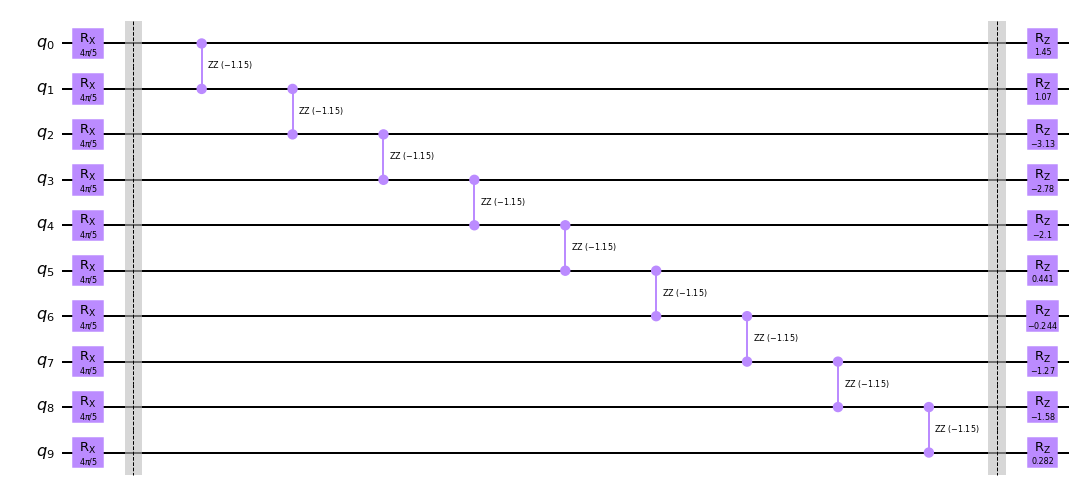

In [49]:
fc = floquetCircuit(10, defineCircuit(10), 0.8)
fc.draw()

Congratulations! You made it to the end of this coding exercise! You should have a circuit that looks like the one above. 